In [1]:
import torch
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import random
import torch.nn as nn
import torch.nn.functional as F

In [2]:
ligands = ["TNF", "R84", "PIC", "P3K", "FLA", "CpG", "FSL", "LPS", "UST"]
polarization = ["", "ib", "ig", "i0", "i3", "i4"]
replicas, size = 2, 1288

In [3]:
from core.getdata import *
from core.dataset import *

<h3>Example of GetData</h3>

In [4]:
TNFib1 = GetData(ligands[0], polarization[1], replicas, size)
TNFib1.X.shape

(1288, 98)

<h3>Example of Dataset</h3>

In [5]:
data = Dataset(ligands, polarization, replicas, size)

In [6]:
%%time
for _ in data:
    pass

Wall time: 37 ms


In [7]:
data.data.shape

(69552, 98, 1)

In [8]:
print(type(data.data), type(data.labels))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [9]:
print(data.labels, data.labels.shape) #labels are multi-hot encoded

[0 0 0 ... 8 8 8] (69552,)


<h3>Initializing Dataloaders</h3>

In [10]:
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

In [11]:
X_len, test_len = int(len(data.data) * 0.75), int(len(data.data) * 0.25)
train_len, val_len = int(X_len * 0.75), int(X_len * 0.25)
print(X_len, test_len, train_len, val_len) #lengths
print(X_len + test_len, len(data.data))

52164 17388 39123 13041
69552 69552


In [12]:
training_data = data.data.reshape(data.data.shape[0], data.data.shape[1], 1) #adds extra dimension

In [13]:
data.data[1000].shape
len(data)

69552

In [14]:
dataset_X, dataset_val = torch.utils.data.random_split(data, [X_len, test_len]) # need separate data and labels for LSTM?

In [15]:
dataloader_train = torch.utils.data.DataLoader(dataset_X, batch_size=64, shuffle=True)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=64, shuffle=True)

In [16]:
print(len(dataloader_train), len(dataloader_val), len(dataloader_train) + len(dataloader_val))
###
#data[0:10]

816 272 1088


<h3>Model Training and Evaluation</h3>

In [17]:
from core.network import *
from core.trainer import *

In [18]:
torch.cuda.is_available()

True

In [19]:
#model parameters
input_size = 1
hidden_sizes = [10, 32]
output_size = 9

#training parameters
n_epochs = 300
batch_size = 64
learning_rate = 1e-3

In [20]:
model = LSTM(input_size, hidden_sizes, output_size, num_layers=3, device="cuda:0")
model.train()

LSTM(
  (lstm): LSTM(1, 10, batch_first=True)
  (fc1): Linear(in_features=10, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=9, bias=True)
)

In [21]:
trainer = LSTMTrainer(model=model, device="cuda:0")

In [22]:
trainer.train(dataloader_train, dataloader_val, batch_size=batch_size, n_epochs=n_epochs)

  0%|▎                                                                                 | 1/300 [00:04<21:14,  4.26s/it]

Epoch 001: | Training Loss: 2.170820436349102 | Validation Loss: 2.155395846156513


  1%|▌                                                                                 | 2/300 [00:07<18:46,  3.78s/it]

Epoch 002: | Training Loss: 2.173054270008031 | Validation Loss: 2.1801051330917023


  1%|▊                                                                                 | 3/300 [00:11<18:11,  3.67s/it]

Epoch 003: | Training Loss: 2.1711619391160855 | Validation Loss: 2.142317004940089


  1%|█                                                                                 | 4/300 [00:14<18:01,  3.65s/it]

Epoch 004: | Training Loss: 2.1321593780143586 | Validation Loss: 2.104105345904827


  2%|█▎                                                                                | 5/300 [00:18<17:50,  3.63s/it]

Epoch 005: | Training Loss: 2.085911069576647 | Validation Loss: 2.068032023661277


  2%|█▋                                                                                | 6/300 [00:22<17:39,  3.60s/it]

Epoch 006: | Training Loss: 2.053461206163846 | Validation Loss: 2.03971872084281


  2%|█▉                                                                                | 7/300 [00:25<17:33,  3.60s/it]

Epoch 007: | Training Loss: 2.0347773965959455 | Validation Loss: 2.0222559580031563


  3%|██▏                                                                               | 8/300 [00:29<17:17,  3.55s/it]

Epoch 008: | Training Loss: 2.0120298231349274 | Validation Loss: 2.004755320794442


  3%|██▍                                                                               | 9/300 [00:32<17:07,  3.53s/it]

Epoch 009: | Training Loss: 1.9938070389862155 | Validation Loss: 1.978795641047113


  3%|██▋                                                                              | 10/300 [00:35<16:56,  3.50s/it]

Epoch 010: | Training Loss: 1.9764522002900349 | Validation Loss: 1.9642733208396856


  4%|██▉                                                                              | 11/300 [00:39<16:46,  3.48s/it]

Epoch 011: | Training Loss: 1.96163149265682 | Validation Loss: 1.9447477082995808


  4%|███▏                                                                             | 12/300 [00:42<16:41,  3.48s/it]

Epoch 012: | Training Loss: 1.9522729425453673 | Validation Loss: 1.9444885262671638


  4%|███▌                                                                             | 13/300 [00:46<16:35,  3.47s/it]

Epoch 013: | Training Loss: 1.944658139318812 | Validation Loss: 1.9489938564160292


  5%|███▊                                                                             | 14/300 [00:49<16:29,  3.46s/it]

Epoch 014: | Training Loss: 1.93695109571312 | Validation Loss: 1.9270761911483372


  5%|████                                                                             | 15/300 [00:53<16:24,  3.45s/it]

Epoch 015: | Training Loss: 1.939186399912133 | Validation Loss: 1.9192818087690018


  5%|████▎                                                                            | 16/300 [00:56<16:20,  3.45s/it]

Epoch 016: | Training Loss: 1.907414732756568 | Validation Loss: 1.887221321463585


  6%|████▌                                                                            | 17/300 [01:00<16:17,  3.46s/it]

Epoch 017: | Training Loss: 1.8715699845377136 | Validation Loss: 1.8613217039143337


  6%|████▊                                                                            | 18/300 [01:03<16:16,  3.46s/it]

Epoch 018: | Training Loss: 1.9794069477448277 | Validation Loss: 1.9924015880507582


  6%|█████▏                                                                           | 19/300 [01:07<16:12,  3.46s/it]

Epoch 019: | Training Loss: 1.8596204054706238 | Validation Loss: 1.8411306581076454


  7%|█████▍                                                                           | 20/300 [01:10<16:10,  3.46s/it]

Epoch 020: | Training Loss: 1.8322016554428082 | Validation Loss: 1.8216275559628712


  7%|█████▋                                                                           | 21/300 [01:13<16:05,  3.46s/it]

Epoch 021: | Training Loss: 1.823571291624331 | Validation Loss: 1.8260796731885742


  7%|█████▉                                                                           | 22/300 [01:17<16:00,  3.46s/it]

Epoch 022: | Training Loss: 1.8165039653871573 | Validation Loss: 1.8317197565646732


  8%|██████▏                                                                          | 23/300 [01:20<15:56,  3.45s/it]

Epoch 023: | Training Loss: 1.8075764855625582 | Validation Loss: 1.8027978429899496


  8%|██████▍                                                                          | 24/300 [01:24<15:52,  3.45s/it]

Epoch 024: | Training Loss: 1.801298781791154 | Validation Loss: 1.7971828010152369


  8%|██████▊                                                                          | 25/300 [01:27<15:50,  3.46s/it]

Epoch 025: | Training Loss: 1.8021290464436306 | Validation Loss: 1.7951081329408813


  9%|███████                                                                          | 26/300 [01:31<15:48,  3.46s/it]

Epoch 026: | Training Loss: 1.7918400238541996 | Validation Loss: 1.7853073968606836


  9%|███████▎                                                                         | 27/300 [01:34<15:44,  3.46s/it]

Epoch 027: | Training Loss: 1.789854733675134 | Validation Loss: 1.775579753167489


  9%|███████▌                                                                         | 28/300 [01:38<15:39,  3.45s/it]

Epoch 028: | Training Loss: 1.7844947672942106 | Validation Loss: 1.7752083667060907


 10%|███████▊                                                                         | 29/300 [01:41<15:35,  3.45s/it]

Epoch 029: | Training Loss: 1.7796507859054733 | Validation Loss: 1.7756840450798763


 10%|████████                                                                         | 30/300 [01:45<15:32,  3.45s/it]

Epoch 030: | Training Loss: 1.7793057182548093 | Validation Loss: 1.7882052318138235


 10%|████████▎                                                                        | 31/300 [01:48<15:28,  3.45s/it]

Epoch 031: | Training Loss: 1.7911176682979453 | Validation Loss: 1.8069458599476254


 11%|████████▋                                                                        | 32/300 [01:51<15:26,  3.46s/it]

Epoch 032: | Training Loss: 1.7778538839489806 | Validation Loss: 1.7784385865225512


 11%|████████▉                                                                        | 33/300 [01:55<15:21,  3.45s/it]

Epoch 033: | Training Loss: 1.9242419054110844 | Validation Loss: 1.9571565192411928


 11%|█████████▏                                                                       | 34/300 [01:58<15:19,  3.46s/it]

Epoch 034: | Training Loss: 1.8620651713481136 | Validation Loss: 1.818555033820517


 12%|█████████▍                                                                       | 35/300 [02:02<15:15,  3.46s/it]

Epoch 035: | Training Loss: 1.7866566033632147 | Validation Loss: 1.7709805698079222


 12%|█████████▋                                                                       | 36/300 [02:05<15:12,  3.46s/it]

Epoch 036: | Training Loss: 1.769629090878309 | Validation Loss: 1.7658832266050226


 12%|█████████▉                                                                       | 37/300 [02:09<15:08,  3.45s/it]

Epoch 037: | Training Loss: 1.7649175089363958 | Validation Loss: 1.788297366570024


 13%|██████████▎                                                                      | 38/300 [02:12<15:04,  3.45s/it]

Epoch 038: | Training Loss: 1.7674550511965565 | Validation Loss: 1.7523890611003428


 13%|██████████▌                                                                      | 39/300 [02:16<14:59,  3.45s/it]

Epoch 039: | Training Loss: 1.7795675652576428 | Validation Loss: 1.7580049178179573


 13%|██████████▊                                                                      | 40/300 [02:19<14:56,  3.45s/it]

Epoch 040: | Training Loss: 1.7877231069347437 | Validation Loss: 1.7703497896299643


 14%|███████████                                                                      | 41/300 [02:23<14:53,  3.45s/it]

Epoch 041: | Training Loss: 1.7670715484841197 | Validation Loss: 1.858189933001995


 14%|███████████▎                                                                     | 42/300 [02:26<14:49,  3.45s/it]

Epoch 042: | Training Loss: 1.764677815577563 | Validation Loss: 1.761725456399076


 14%|███████████▌                                                                     | 43/300 [02:29<14:46,  3.45s/it]

Epoch 043: | Training Loss: 1.7495721634112151 | Validation Loss: 1.7413458837305797


 15%|███████████▉                                                                     | 44/300 [02:33<14:43,  3.45s/it]

Epoch 044: | Training Loss: 1.8268312116463978 | Validation Loss: 1.752197778400253


 15%|████████████▏                                                                    | 45/300 [02:36<14:39,  3.45s/it]

Epoch 045: | Training Loss: 1.7596082355754048 | Validation Loss: 1.8045458925120972


 15%|████████████▍                                                                    | 46/300 [02:40<14:35,  3.45s/it]

Epoch 046: | Training Loss: 1.7628320776948743 | Validation Loss: 1.7631225191494997


 16%|████████████▋                                                                    | 47/300 [02:43<14:31,  3.45s/it]

Epoch 047: | Training Loss: 1.7487143748531155 | Validation Loss: 1.755315726294237


 16%|████████████▉                                                                    | 48/300 [02:47<14:29,  3.45s/it]

Epoch 048: | Training Loss: 1.756568600587985 | Validation Loss: 1.7467025514034664


 16%|█████████████▏                                                                   | 49/300 [02:50<14:25,  3.45s/it]

Epoch 049: | Training Loss: 1.7587306274502885 | Validation Loss: 1.7880672860671492


 17%|█████████████▌                                                                   | 50/300 [02:54<14:23,  3.45s/it]

Epoch 050: | Training Loss: 1.7511191300901712 | Validation Loss: 1.768788713742705


 17%|█████████████▊                                                                   | 51/300 [02:57<14:19,  3.45s/it]

Epoch 051: | Training Loss: 1.7431266724186785 | Validation Loss: 1.7828960414318478


 17%|██████████████                                                                   | 52/300 [03:01<14:18,  3.46s/it]

Epoch 052: | Training Loss: 1.7623308382782281 | Validation Loss: 1.7313476318822187


 18%|██████████████▎                                                                  | 53/300 [03:04<14:14,  3.46s/it]

Epoch 053: | Training Loss: 1.7480689934363551 | Validation Loss: 1.7552483739221798


 18%|██████████████▌                                                                  | 54/300 [03:07<14:10,  3.46s/it]

Epoch 054: | Training Loss: 1.7339816837041986 | Validation Loss: 1.7448817807085373


 18%|██████████████▊                                                                  | 55/300 [03:11<14:06,  3.46s/it]

Epoch 055: | Training Loss: 1.7314395374234985 | Validation Loss: 1.7299018085879438


 19%|███████████████                                                                  | 56/300 [03:14<14:02,  3.45s/it]

Epoch 056: | Training Loss: 1.736766309568695 | Validation Loss: 1.7585202560705298


 19%|███████████████▍                                                                 | 57/300 [03:18<13:58,  3.45s/it]

Epoch 057: | Training Loss: 1.7312194906613405 | Validation Loss: 1.72261390659739


 19%|███████████████▋                                                                 | 58/300 [03:21<13:56,  3.46s/it]

Epoch 058: | Training Loss: 1.7223152855739874 | Validation Loss: 1.7215780804262442


 20%|███████████████▉                                                                 | 59/300 [03:25<13:53,  3.46s/it]

Epoch 059: | Training Loss: 1.7211441974721702 | Validation Loss: 1.7411624986459227


 20%|████████████████▏                                                                | 60/300 [03:28<13:49,  3.46s/it]

Epoch 060: | Training Loss: 1.724491281398371 | Validation Loss: 1.7226414715542513


 20%|████████████████▍                                                                | 61/300 [03:32<13:45,  3.46s/it]

Epoch 061: | Training Loss: 1.714229131738345 | Validation Loss: 1.717864651890362


 21%|████████████████▋                                                                | 62/300 [03:35<13:42,  3.45s/it]

Epoch 062: | Training Loss: 1.707223419173091 | Validation Loss: 1.7091913451166714


 21%|█████████████████                                                                | 63/300 [03:39<13:38,  3.45s/it]

Epoch 063: | Training Loss: 1.7017945166604191 | Validation Loss: 1.7068665067062658


 21%|█████████████████▎                                                               | 64/300 [03:42<13:34,  3.45s/it]

Epoch 064: | Training Loss: 1.6970546511458415 | Validation Loss: 1.6937887725584648


 22%|█████████████████▌                                                               | 65/300 [03:45<13:30,  3.45s/it]

Epoch 065: | Training Loss: 1.7053729219763887 | Validation Loss: 1.751233989263282


 22%|█████████████████▊                                                               | 66/300 [03:49<13:25,  3.44s/it]

Epoch 066: | Training Loss: 1.7179733506020378 | Validation Loss: 1.7136423991006964


 22%|██████████████████                                                               | 67/300 [03:52<13:21,  3.44s/it]

Epoch 067: | Training Loss: 1.6972691768816872 | Validation Loss: 1.6956116202123024


 23%|██████████████████▎                                                              | 68/300 [03:56<13:17,  3.44s/it]

Epoch 068: | Training Loss: 1.68656298401309 | Validation Loss: 1.6920384243130684


 23%|██████████████████▋                                                              | 69/300 [03:59<13:16,  3.45s/it]

Epoch 069: | Training Loss: 1.6921290844386698 | Validation Loss: 1.695380568942603


 23%|██████████████████▉                                                              | 70/300 [04:03<13:13,  3.45s/it]

Epoch 070: | Training Loss: 1.6797158323666628 | Validation Loss: 1.6800959530998678


 24%|███████████████████▏                                                             | 71/300 [04:06<13:10,  3.45s/it]

Epoch 071: | Training Loss: 1.6693763179229755 | Validation Loss: 1.6709714531898499


 24%|███████████████████▍                                                             | 72/300 [04:10<13:07,  3.45s/it]

Epoch 072: | Training Loss: 1.6653763033887918 | Validation Loss: 1.6762494668364525


 24%|███████████████████▋                                                             | 73/300 [04:13<13:04,  3.45s/it]

Epoch 073: | Training Loss: 1.6622325567638172 | Validation Loss: 1.6628137287848137


 25%|███████████████████▉                                                             | 74/300 [04:16<13:00,  3.46s/it]

Epoch 074: | Training Loss: 1.6578797787135722 | Validation Loss: 1.6703012265703256


 25%|████████████████████▎                                                            | 75/300 [04:20<12:57,  3.45s/it]

Epoch 075: | Training Loss: 1.6565546150885375 | Validation Loss: 1.66064853265005


 25%|████████████████████▌                                                            | 76/300 [04:23<12:53,  3.45s/it]

Epoch 076: | Training Loss: 1.6504026455622094 | Validation Loss: 1.6528553594561184


 26%|████████████████████▊                                                            | 77/300 [04:27<12:52,  3.47s/it]

Epoch 077: | Training Loss: 1.647264006967638 | Validation Loss: 1.66079560974065


 26%|█████████████████████                                                            | 78/300 [04:30<12:54,  3.49s/it]

Epoch 078: | Training Loss: 1.6448745695399303 | Validation Loss: 1.657096089247395


 26%|█████████████████████▎                                                           | 79/300 [04:34<12:48,  3.48s/it]

Epoch 079: | Training Loss: 1.6431649208945387 | Validation Loss: 1.6490431669003822


 27%|█████████████████████▌                                                           | 80/300 [04:37<12:43,  3.47s/it]

Epoch 080: | Training Loss: 1.6395652440248751 | Validation Loss: 1.640855861499029


 27%|█████████████████████▊                                                           | 81/300 [04:41<12:38,  3.46s/it]

Epoch 081: | Training Loss: 1.6385362628920406 | Validation Loss: 1.6484557666322763


 27%|██████████████████████▏                                                          | 82/300 [04:44<12:34,  3.46s/it]

Epoch 082: | Training Loss: 1.6368298520352327 | Validation Loss: 1.6439629052491749


 28%|██████████████████████▍                                                          | 83/300 [04:48<12:30,  3.46s/it]

Epoch 083: | Training Loss: 1.6354782454231207 | Validation Loss: 1.6383641980150168


 28%|██████████████████████▋                                                          | 84/300 [04:51<12:27,  3.46s/it]

Epoch 084: | Training Loss: 1.6327094492666863 | Validation Loss: 1.663705974817276


 28%|██████████████████████▉                                                          | 85/300 [04:55<12:23,  3.46s/it]

Epoch 085: | Training Loss: 1.6309395926986254 | Validation Loss: 1.6455627754330635


 29%|███████████████████████▏                                                         | 86/300 [04:58<12:34,  3.53s/it]

Epoch 086: | Training Loss: 1.6308093855486196 | Validation Loss: 1.646639255039832


 29%|███████████████████████▍                                                         | 87/300 [05:02<12:35,  3.54s/it]

Epoch 087: | Training Loss: 1.6293681633530879 | Validation Loss: 1.6340459160068457


 29%|███████████████████████▊                                                         | 88/300 [05:05<12:25,  3.52s/it]

Epoch 088: | Training Loss: 1.6259327142261992 | Validation Loss: 1.6357812636038835


 30%|████████████████████████                                                         | 89/300 [05:09<12:24,  3.53s/it]

Epoch 089: | Training Loss: 1.6253776554675663 | Validation Loss: 1.6382741340819527


 30%|████████████████████████▎                                                        | 90/300 [05:12<12:20,  3.53s/it]

Epoch 090: | Training Loss: 1.6227259754988492 | Validation Loss: 1.633216683040647


 30%|████████████████████████▌                                                        | 91/300 [05:16<12:11,  3.50s/it]

Epoch 091: | Training Loss: 1.6221508582433064 | Validation Loss: 1.6408256669254864


 31%|████████████████████████▊                                                        | 92/300 [05:19<12:04,  3.48s/it]

Epoch 092: | Training Loss: 1.6218781221438856 | Validation Loss: 1.6447959551039864


 31%|█████████████████████████                                                        | 93/300 [05:23<11:58,  3.47s/it]

Epoch 093: | Training Loss: 1.6193453289714514 | Validation Loss: 1.6346100485500168


 31%|█████████████████████████▍                                                       | 94/300 [05:26<12:05,  3.52s/it]

Epoch 094: | Training Loss: 1.6193561419552447 | Validation Loss: 1.6291627217741573


 32%|█████████████████████████▋                                                       | 95/300 [05:30<12:16,  3.59s/it]

Epoch 095: | Training Loss: 1.617561731852737 | Validation Loss: 1.6359394937753677


 32%|█████████████████████████▉                                                       | 96/300 [05:34<12:35,  3.70s/it]

Epoch 096: | Training Loss: 1.619025740553351 | Validation Loss: 1.6266183883828276


 32%|██████████████████████████▏                                                      | 97/300 [05:38<12:23,  3.66s/it]

Epoch 097: | Training Loss: 1.615184541426453 | Validation Loss: 1.622227450942292


 33%|██████████████████████████▍                                                      | 98/300 [05:41<12:07,  3.60s/it]

Epoch 098: | Training Loss: 1.6132502288502806 | Validation Loss: 1.6353415469912922


 33%|██████████████████████████▋                                                      | 99/300 [05:45<12:01,  3.59s/it]

Epoch 099: | Training Loss: 1.6125686827535723 | Validation Loss: 1.6270972104633556


 33%|██████████████████████████▋                                                     | 100/300 [05:48<11:56,  3.58s/it]

Epoch 100: | Training Loss: 1.6108577356618994 | Validation Loss: 1.619065247476101


 34%|██████████████████████████▉                                                     | 101/300 [05:52<12:00,  3.62s/it]

Epoch 101: | Training Loss: 1.6108910548044186 | Validation Loss: 1.6111187706975376


 34%|███████████████████████████▏                                                    | 102/300 [05:56<12:07,  3.68s/it]

Epoch 102: | Training Loss: 1.6070913037686956 | Validation Loss: 1.611458631561083


 34%|███████████████████████████▍                                                    | 103/300 [06:00<12:32,  3.82s/it]

Epoch 103: | Training Loss: 1.6078966170841573 | Validation Loss: 1.625511237365358


 35%|███████████████████████████▋                                                    | 104/300 [06:04<12:44,  3.90s/it]

Epoch 104: | Training Loss: 1.606078791852091 | Validation Loss: 1.6174451743855196


 35%|████████████████████████████                                                    | 105/300 [06:08<12:36,  3.88s/it]

Epoch 105: | Training Loss: 1.6052296984137273 | Validation Loss: 1.6130052213283146


 35%|████████████████████████████▎                                                   | 106/300 [06:11<12:15,  3.79s/it]

Epoch 106: | Training Loss: 1.6045876143901956 | Validation Loss: 1.6221626628847683


 36%|████████████████████████████▌                                                   | 107/300 [06:15<12:12,  3.80s/it]

Epoch 107: | Training Loss: 1.601959409959176 | Validation Loss: 1.6166254194343792


 36%|████████████████████████████▊                                                   | 108/300 [06:19<11:53,  3.72s/it]

Epoch 108: | Training Loss: 1.6010136839513684 | Validation Loss: 1.6106885342913515


 36%|█████████████████████████████                                                   | 109/300 [06:23<12:07,  3.81s/it]

Epoch 109: | Training Loss: 1.6009361416685814 | Validation Loss: 1.6093641427509926


 37%|█████████████████████████████▎                                                  | 110/300 [06:27<12:09,  3.84s/it]

Epoch 110: | Training Loss: 1.5986534709147378 | Validation Loss: 1.6320444095660658


 37%|█████████████████████████████▌                                                  | 111/300 [06:30<11:52,  3.77s/it]

Epoch 111: | Training Loss: 1.598588167306255 | Validation Loss: 1.6023580681751757


 37%|█████████████████████████████▊                                                  | 112/300 [06:34<11:38,  3.72s/it]

Epoch 112: | Training Loss: 1.5957615305395687 | Validation Loss: 1.6086841773460894


 38%|██████████████████████████████▏                                                 | 113/300 [06:37<11:24,  3.66s/it]

Epoch 113: | Training Loss: 1.5941835774802695 | Validation Loss: 1.6016108674161575


 38%|██████████████████████████████▍                                                 | 114/300 [06:41<11:13,  3.62s/it]

Epoch 114: | Training Loss: 1.5935092295209567 | Validation Loss: 1.610643765067353


 38%|██████████████████████████████▋                                                 | 115/300 [06:45<11:19,  3.67s/it]

Epoch 115: | Training Loss: 1.5913653696576755 | Validation Loss: 1.6016663803773767


 39%|██████████████████████████████▉                                                 | 116/300 [06:48<11:10,  3.64s/it]

Epoch 116: | Training Loss: 1.5920858552642898 | Validation Loss: 1.600327512358918


 39%|███████████████████████████████▏                                                | 117/300 [06:52<10:57,  3.59s/it]

Epoch 117: | Training Loss: 1.589640036079229 | Validation Loss: 1.5991197798181982


 39%|███████████████████████████████▍                                                | 118/300 [06:55<10:51,  3.58s/it]

Epoch 118: | Training Loss: 1.5876188972124867 | Validation Loss: 1.5996502348605324


 40%|███████████████████████████████▋                                                | 119/300 [06:59<10:47,  3.58s/it]

Epoch 119: | Training Loss: 1.5885031208688138 | Validation Loss: 1.5951288662412588


 40%|████████████████████████████████                                                | 120/300 [07:02<10:39,  3.55s/it]

Epoch 120: | Training Loss: 1.5863142868175226 | Validation Loss: 1.601575258461868


 40%|████████████████████████████████▎                                               | 121/300 [07:06<10:33,  3.54s/it]

Epoch 121: | Training Loss: 1.5860539464389576 | Validation Loss: 1.5890303775668144


 41%|████████████████████████████████▌                                               | 122/300 [07:09<10:27,  3.53s/it]

Epoch 122: | Training Loss: 1.5845687829104125 | Validation Loss: 1.5916236546986244


 41%|████████████████████████████████▊                                               | 123/300 [07:13<10:21,  3.51s/it]

Epoch 123: | Training Loss: 1.581290485446944 | Validation Loss: 1.5947276643093895


 41%|█████████████████████████████████                                               | 124/300 [07:16<10:15,  3.50s/it]

Epoch 124: | Training Loss: 1.5822888603981804 | Validation Loss: 1.594122848528273


 42%|█████████████████████████████████▎                                              | 125/300 [07:20<10:16,  3.52s/it]

Epoch 125: | Training Loss: 1.580724234090132 | Validation Loss: 1.5895590041490162


 42%|█████████████████████████████████▌                                              | 126/300 [07:24<10:21,  3.57s/it]

Epoch 126: | Training Loss: 1.5808932727166252 | Validation Loss: 1.5972028374671936


 42%|█████████████████████████████████▊                                              | 127/300 [07:27<10:23,  3.61s/it]

Epoch 127: | Training Loss: 1.580221424207968 | Validation Loss: 1.5825802758336067


 43%|██████████████████████████████████▏                                             | 128/300 [07:31<10:20,  3.61s/it]

Epoch 128: | Training Loss: 1.5774677891065092 | Validation Loss: 1.5966207880307646


 43%|██████████████████████████████████▍                                             | 129/300 [07:34<10:13,  3.59s/it]

Epoch 129: | Training Loss: 1.5796372205311178 | Validation Loss: 1.590723789351828


 43%|██████████████████████████████████▋                                             | 130/300 [07:38<10:04,  3.55s/it]

Epoch 130: | Training Loss: 1.57594245643008 | Validation Loss: 1.5907817877390806


 44%|██████████████████████████████████▉                                             | 131/300 [07:41<09:56,  3.53s/it]

Epoch 131: | Training Loss: 1.5761738056499583 | Validation Loss: 1.611137829720974


 44%|███████████████████████████████████▏                                            | 132/300 [07:45<09:51,  3.52s/it]

Epoch 132: | Training Loss: 1.5753421143573874 | Validation Loss: 1.584776491365012


 44%|███████████████████████████████████▍                                            | 133/300 [07:48<09:46,  3.51s/it]

Epoch 133: | Training Loss: 1.5735417639507967 | Validation Loss: 1.5810431807356722


 45%|███████████████████████████████████▋                                            | 134/300 [07:52<09:41,  3.50s/it]

Epoch 134: | Training Loss: 1.574058160039724 | Validation Loss: 1.5854789746158264


 45%|████████████████████████████████████                                            | 135/300 [07:55<09:40,  3.52s/it]

Epoch 135: | Training Loss: 1.5722835017185586 | Validation Loss: 1.5849668593967663


 45%|████████████████████████████████████▎                                           | 136/300 [07:59<09:37,  3.52s/it]

Epoch 136: | Training Loss: 1.572683685988772 | Validation Loss: 1.589353517136153


 46%|████████████████████████████████████▌                                           | 137/300 [08:02<09:33,  3.52s/it]

Epoch 137: | Training Loss: 1.5710367592526417 | Validation Loss: 1.5748499360154657


 46%|████████████████████████████████████▊                                           | 138/300 [08:06<09:28,  3.51s/it]

Epoch 138: | Training Loss: 1.5707933229266429 | Validation Loss: 1.575349261655527


 46%|█████████████████████████████████████                                           | 139/300 [08:09<09:23,  3.50s/it]

Epoch 139: | Training Loss: 1.5719705837614395 | Validation Loss: 1.5836111666525112


 47%|█████████████████████████████████████▎                                          | 140/300 [08:13<09:18,  3.49s/it]

Epoch 140: | Training Loss: 1.5716781179402388 | Validation Loss: 1.583782295093817


 47%|█████████████████████████████████████▌                                          | 141/300 [08:16<09:14,  3.49s/it]

Epoch 141: | Training Loss: 1.569809804213982 | Validation Loss: 1.5883973306592774


 47%|█████████████████████████████████████▊                                          | 142/300 [08:20<09:09,  3.48s/it]

Epoch 142: | Training Loss: 1.567788536642112 | Validation Loss: 1.5891044358996784


 48%|██████████████████████████████████████▏                                         | 143/300 [08:23<09:07,  3.49s/it]

Epoch 143: | Training Loss: 1.569492193267626 | Validation Loss: 1.5851486193783142


 48%|██████████████████████████████████████▍                                         | 144/300 [08:27<09:06,  3.50s/it]

Epoch 144: | Training Loss: 1.566356629425404 | Validation Loss: 1.5726500793414957


 48%|██████████████████████████████████████▋                                         | 145/300 [08:30<09:02,  3.50s/it]

Epoch 145: | Training Loss: 1.565859965103514 | Validation Loss: 1.5790701675064422


 49%|██████████████████████████████████████▉                                         | 146/300 [08:34<08:58,  3.50s/it]

Epoch 146: | Training Loss: 1.5663184232863725 | Validation Loss: 1.5701773832826054


 49%|███████████████████████████████████████▏                                        | 147/300 [08:37<08:53,  3.49s/it]

Epoch 147: | Training Loss: 1.5638541118333154 | Validation Loss: 1.5894381346948006


 49%|███████████████████████████████████████▍                                        | 148/300 [08:41<08:49,  3.48s/it]

Epoch 148: | Training Loss: 1.562440643927046 | Validation Loss: 1.5724324434995651


 50%|███████████████████████████████████████▋                                        | 149/300 [08:44<08:48,  3.50s/it]

Epoch 149: | Training Loss: 1.5644602890984685 | Validation Loss: 1.5874069596038145


 50%|████████████████████████████████████████                                        | 150/300 [08:48<08:45,  3.50s/it]

Epoch 150: | Training Loss: 1.5629054814869283 | Validation Loss: 1.5760096407988493


 50%|████████████████████████████████████████▎                                       | 151/300 [08:51<08:41,  3.50s/it]

Epoch 151: | Training Loss: 1.563024377852094 | Validation Loss: 1.5690102831405752


 51%|████████████████████████████████████████▌                                       | 152/300 [08:55<08:41,  3.52s/it]

Epoch 152: | Training Loss: 1.5606483537338527 | Validation Loss: 1.5690908699351198


 51%|████████████████████████████████████████▊                                       | 153/300 [08:58<08:39,  3.54s/it]

Epoch 153: | Training Loss: 1.5612987874477517 | Validation Loss: 1.5654128329718815


 51%|█████████████████████████████████████████                                       | 154/300 [09:02<08:34,  3.52s/it]

Epoch 154: | Training Loss: 1.5624126163767833 | Validation Loss: 1.5743866190314293


 52%|█████████████████████████████████████████▎                                      | 155/300 [09:05<08:30,  3.52s/it]

Epoch 155: | Training Loss: 1.5607288652190976 | Validation Loss: 1.5750574732528013


 52%|█████████████████████████████████████████▌                                      | 156/300 [09:09<08:26,  3.51s/it]

Epoch 156: | Training Loss: 1.5595738230382694 | Validation Loss: 1.562347646583529


 52%|█████████████████████████████████████████▊                                      | 157/300 [09:12<08:22,  3.51s/it]

Epoch 157: | Training Loss: 1.5588399201047187 | Validation Loss: 1.5632242801434852


 53%|██████████████████████████████████████████▏                                     | 158/300 [09:16<08:18,  3.51s/it]

Epoch 158: | Training Loss: 1.5587020113187677 | Validation Loss: 1.58940490379053


 53%|██████████████████████████████████████████▍                                     | 159/300 [09:19<08:14,  3.51s/it]

Epoch 159: | Training Loss: 1.557549970407112 | Validation Loss: 1.566805601996534


 53%|██████████████████████████████████████████▋                                     | 160/300 [09:23<08:12,  3.52s/it]

Epoch 160: | Training Loss: 1.5577193092481763 | Validation Loss: 1.5610446316354416


 54%|██████████████████████████████████████████▉                                     | 161/300 [09:27<08:09,  3.52s/it]

Epoch 161: | Training Loss: 1.5575711189531813 | Validation Loss: 1.5659186892649706


 54%|███████████████████████████████████████████▏                                    | 162/300 [09:30<08:05,  3.52s/it]

Epoch 162: | Training Loss: 1.5570041312306535 | Validation Loss: 1.568712772691951


 54%|███████████████████████████████████████████▍                                    | 163/300 [09:34<08:01,  3.52s/it]

Epoch 163: | Training Loss: 1.5552122065541791 | Validation Loss: 1.5606905936318285


 55%|███████████████████████████████████████████▋                                    | 164/300 [09:37<07:58,  3.52s/it]

Epoch 164: | Training Loss: 1.5538484922372828 | Validation Loss: 1.5677733491448795


 55%|████████████████████████████████████████████                                    | 165/300 [09:41<07:53,  3.51s/it]

Epoch 165: | Training Loss: 1.5539839837480993 | Validation Loss: 1.560421628110549


 55%|████████████████████████████████████████████▎                                   | 166/300 [09:44<07:50,  3.51s/it]

Epoch 166: | Training Loss: 1.5548427487705268 | Validation Loss: 1.556939397664631


 56%|████████████████████████████████████████████▌                                   | 167/300 [09:48<07:46,  3.51s/it]

Epoch 167: | Training Loss: 1.5524115810791652 | Validation Loss: 1.57821986079216


 56%|████████████████████████████████████████████▊                                   | 168/300 [09:51<07:42,  3.51s/it]

Epoch 168: | Training Loss: 1.5511580314121993 | Validation Loss: 1.553026217748137


 56%|█████████████████████████████████████████████                                   | 169/300 [09:55<07:42,  3.53s/it]

Epoch 169: | Training Loss: 1.550147944659579 | Validation Loss: 1.5553786482881098


 57%|█████████████████████████████████████████████▎                                  | 170/300 [09:58<07:40,  3.54s/it]

Epoch 170: | Training Loss: 1.5512379964484888 | Validation Loss: 1.5593183982898207


 57%|█████████████████████████████████████████████▌                                  | 171/300 [10:02<07:36,  3.54s/it]

Epoch 171: | Training Loss: 1.5500564448097174 | Validation Loss: 1.5539771007264362


 57%|█████████████████████████████████████████████▊                                  | 172/300 [10:05<07:32,  3.54s/it]

Epoch 172: | Training Loss: 1.5479368070761363 | Validation Loss: 1.5543607569792692


 58%|██████████████████████████████████████████████▏                                 | 173/300 [10:09<07:28,  3.53s/it]

Epoch 173: | Training Loss: 1.5469701741548145 | Validation Loss: 1.560898539774558


 58%|██████████████████████████████████████████████▍                                 | 174/300 [10:12<07:25,  3.53s/it]

Epoch 174: | Training Loss: 1.5471832163485826 | Validation Loss: 1.554462170776199


 58%|██████████████████████████████████████████████▋                                 | 175/300 [10:16<07:20,  3.52s/it]

Epoch 175: | Training Loss: 1.546389294605629 | Validation Loss: 1.5514664145953514


 59%|██████████████████████████████████████████████▉                                 | 176/300 [10:19<07:16,  3.52s/it]

Epoch 176: | Training Loss: 1.5462035694543053 | Validation Loss: 1.5572775225428974


 59%|███████████████████████████████████████████████▏                                | 177/300 [10:23<07:14,  3.53s/it]

Epoch 177: | Training Loss: 1.5448778460130972 | Validation Loss: 1.5491775716928875


 59%|███████████████████████████████████████████████▍                                | 178/300 [10:26<07:11,  3.54s/it]

Epoch 178: | Training Loss: 1.546650593771654 | Validation Loss: 1.560398011961404


 60%|███████████████████████████████████████████████▋                                | 179/300 [10:30<07:07,  3.53s/it]

Epoch 179: | Training Loss: 1.5450127999864371 | Validation Loss: 1.5554040306631256


 60%|████████████████████████████████████████████████                                | 180/300 [10:34<07:02,  3.52s/it]

Epoch 180: | Training Loss: 1.5436861385025231 | Validation Loss: 1.5549471316968693


 60%|████████████████████████████████████████████████▎                               | 181/300 [10:37<06:58,  3.52s/it]

Epoch 181: | Training Loss: 1.541970028596766 | Validation Loss: 1.545200405313688


 61%|████████████████████████████████████████████████▌                               | 182/300 [10:41<06:54,  3.52s/it]

Epoch 182: | Training Loss: 1.5422231644099833 | Validation Loss: 1.5512738920309965


 61%|████████████████████████████████████████████████▊                               | 183/300 [10:44<06:51,  3.52s/it]

Epoch 183: | Training Loss: 1.5410176695269697 | Validation Loss: 1.5479730836608832


 61%|█████████████████████████████████████████████████                               | 184/300 [10:48<06:47,  3.52s/it]

Epoch 184: | Training Loss: 1.5402089218590773 | Validation Loss: 1.5424623590181856


 62%|█████████████████████████████████████████████████▎                              | 185/300 [10:51<06:44,  3.52s/it]

Epoch 185: | Training Loss: 1.5408649898919404 | Validation Loss: 1.5555918308741905


 62%|█████████████████████████████████████████████████▌                              | 186/300 [10:55<06:42,  3.53s/it]

Epoch 186: | Training Loss: 1.5397432426027222 | Validation Loss: 1.5477911019149948


 62%|█████████████████████████████████████████████████▊                              | 187/300 [10:58<06:40,  3.54s/it]

Epoch 187: | Training Loss: 1.5395385744232757 | Validation Loss: 1.5441517435452516


 63%|██████████████████████████████████████████████████▏                             | 188/300 [11:02<06:35,  3.53s/it]

Epoch 188: | Training Loss: 1.5376969217961909 | Validation Loss: 1.5486561432480812


 63%|██████████████████████████████████████████████████▍                             | 189/300 [11:05<06:31,  3.53s/it]

Epoch 189: | Training Loss: 1.540289953204931 | Validation Loss: 1.543187687502188


 63%|██████████████████████████████████████████████████▋                             | 190/300 [11:09<06:27,  3.53s/it]

Epoch 190: | Training Loss: 1.537112007976747 | Validation Loss: 1.5576685557470602


 64%|██████████████████████████████████████████████████▉                             | 191/300 [11:12<06:24,  3.52s/it]

Epoch 191: | Training Loss: 1.5365886372678421 | Validation Loss: 1.5606658309698105


 64%|███████████████████████████████████████████████████▏                            | 192/300 [11:16<06:19,  3.52s/it]

Epoch 192: | Training Loss: 1.5376515312522065 | Validation Loss: 1.5481245390632574


 64%|███████████████████████████████████████████████████▍                            | 193/300 [11:19<06:15,  3.51s/it]

Epoch 193: | Training Loss: 1.5367230219291705 | Validation Loss: 1.5436035105410744


 65%|███████████████████████████████████████████████████▋                            | 194/300 [11:23<06:13,  3.53s/it]

Epoch 194: | Training Loss: 1.5358251510005372 | Validation Loss: 1.5414392409079216


 65%|████████████████████████████████████████████████████                            | 195/300 [11:26<06:11,  3.54s/it]

Epoch 195: | Training Loss: 1.5354246482545255 | Validation Loss: 1.5552818700671196


 65%|████████████████████████████████████████████████████▎                           | 196/300 [11:30<06:08,  3.55s/it]

Epoch 196: | Training Loss: 1.5336699716600717 | Validation Loss: 1.5672660794328241


 66%|████████████████████████████████████████████████████▌                           | 197/300 [11:33<06:04,  3.54s/it]

Epoch 197: | Training Loss: 1.5334234610930377 | Validation Loss: 1.5457214840194757


 66%|████████████████████████████████████████████████████▊                           | 198/300 [11:37<06:01,  3.54s/it]

Epoch 198: | Training Loss: 1.533404730406462 | Validation Loss: 1.5383324697613716


 66%|█████████████████████████████████████████████████████                           | 199/300 [11:41<05:58,  3.55s/it]

Epoch 199: | Training Loss: 1.5331349684035076 | Validation Loss: 1.5425408285330324


 67%|█████████████████████████████████████████████████████▎                          | 200/300 [11:44<05:53,  3.54s/it]

Epoch 200: | Training Loss: 1.5332065787093312 | Validation Loss: 1.541531667989843


 67%|█████████████████████████████████████████████████████▌                          | 201/300 [11:48<05:49,  3.53s/it]

Epoch 201: | Training Loss: 1.5323739725292898 | Validation Loss: 1.5427195697146303


 67%|█████████████████████████████████████████████████████▊                          | 202/300 [11:51<05:45,  3.52s/it]

Epoch 202: | Training Loss: 1.5310131463350034 | Validation Loss: 1.539793872657944


 68%|██████████████████████████████████████████████████████▏                         | 203/300 [11:55<05:42,  3.53s/it]

Epoch 203: | Training Loss: 1.5303487884355527 | Validation Loss: 1.5346115362994812


 68%|██████████████████████████████████████████████████████▍                         | 204/300 [11:58<05:41,  3.56s/it]

Epoch 204: | Training Loss: 1.5293826481290893 | Validation Loss: 1.5362149656695478


 68%|██████████████████████████████████████████████████████▋                         | 205/300 [12:02<05:37,  3.55s/it]

Epoch 205: | Training Loss: 1.5292964755904441 | Validation Loss: 1.5354259439251001


 69%|██████████████████████████████████████████████████████▉                         | 206/300 [12:05<05:32,  3.54s/it]

Epoch 206: | Training Loss: 1.5322788556416829 | Validation Loss: 1.5372194235815722


 69%|███████████████████████████████████████████████████████▏                        | 207/300 [12:10<05:51,  3.78s/it]

Epoch 207: | Training Loss: 1.5290742913881938 | Validation Loss: 1.5573386961922926


 69%|███████████████████████████████████████████████████████▍                        | 208/300 [12:14<05:53,  3.84s/it]

Epoch 208: | Training Loss: 1.5312958055851507 | Validation Loss: 1.5469826429205782


 70%|███████████████████████████████████████████████████████▋                        | 209/300 [12:18<05:49,  3.84s/it]

Epoch 209: | Training Loss: 1.5291888202522315 | Validation Loss: 1.5320379940025948


 70%|████████████████████████████████████████████████████████                        | 210/300 [12:21<05:47,  3.86s/it]

Epoch 210: | Training Loss: 1.5310925838409686 | Validation Loss: 1.5300700787235708


 70%|████████████████████████████████████████████████████████▎                       | 211/300 [12:27<06:32,  4.41s/it]

Epoch 211: | Training Loss: 1.5270999272664387 | Validation Loss: 1.5376619591432459


 71%|████████████████████████████████████████████████████████▌                       | 212/300 [12:31<06:11,  4.22s/it]

Epoch 212: | Training Loss: 1.5275810257184739 | Validation Loss: 1.531063073698212


 71%|████████████████████████████████████████████████████████▊                       | 213/300 [12:35<05:54,  4.08s/it]

Epoch 213: | Training Loss: 1.5254953120853387 | Validation Loss: 1.5336378637482138


 71%|█████████████████████████████████████████████████████████                       | 214/300 [12:38<05:40,  3.96s/it]

Epoch 214: | Training Loss: 1.5263620771321595 | Validation Loss: 1.5393685843138134


 72%|█████████████████████████████████████████████████████████▎                      | 215/300 [12:42<05:31,  3.90s/it]

Epoch 215: | Training Loss: 1.528797652207169 | Validation Loss: 1.5296194540227162


 72%|█████████████████████████████████████████████████████████▌                      | 216/300 [12:46<05:23,  3.85s/it]

Epoch 216: | Training Loss: 1.5265418928043515 | Validation Loss: 1.5363959560499472


 72%|█████████████████████████████████████████████████████████▊                      | 217/300 [12:50<05:17,  3.83s/it]

Epoch 217: | Training Loss: 1.5253789904070836 | Validation Loss: 1.5317370199105318


 73%|██████████████████████████████████████████████████████████▏                     | 218/300 [12:53<05:11,  3.79s/it]

Epoch 218: | Training Loss: 1.525404785924098 | Validation Loss: 1.5399345913354088


 73%|██████████████████████████████████████████████████████████▍                     | 219/300 [12:57<05:09,  3.82s/it]

Epoch 219: | Training Loss: 1.5263864769070756 | Validation Loss: 1.541070625624236


 73%|██████████████████████████████████████████████████████████▋                     | 220/300 [13:01<05:04,  3.81s/it]

Epoch 220: | Training Loss: 1.5256412314141499 | Validation Loss: 1.5555056324776482


 74%|██████████████████████████████████████████████████████████▉                     | 221/300 [13:05<04:59,  3.80s/it]

Epoch 221: | Training Loss: 1.525973103940487 | Validation Loss: 1.528903554467594


 74%|███████████████████████████████████████████████████████████▏                    | 222/300 [13:09<04:56,  3.80s/it]

Epoch 222: | Training Loss: 1.5239417240315793 | Validation Loss: 1.5274978424696362


 74%|███████████████████████████████████████████████████████████▍                    | 223/300 [13:12<04:50,  3.77s/it]

Epoch 223: | Training Loss: 1.5235714681592643 | Validation Loss: 1.5279666720067753


 75%|███████████████████████████████████████████████████████████▋                    | 224/300 [13:16<04:44,  3.75s/it]

Epoch 224: | Training Loss: 1.5619861213307755 | Validation Loss: 1.5398315169355448


 75%|████████████████████████████████████████████████████████████                    | 225/300 [13:20<04:39,  3.72s/it]

Epoch 225: | Training Loss: 1.5262314910982169 | Validation Loss: 1.52987199846436


 75%|████████████████████████████████████████████████████████████▎                   | 226/300 [13:23<04:35,  3.72s/it]

Epoch 226: | Training Loss: 1.520675714328593 | Validation Loss: 1.5325514713630957


 76%|████████████████████████████████████████████████████████████▌                   | 227/300 [13:27<04:31,  3.72s/it]

Epoch 227: | Training Loss: 1.5201241555897629 | Validation Loss: 1.5306201721815502


 76%|████████████████████████████████████████████████████████████▊                   | 228/300 [13:31<04:27,  3.71s/it]

Epoch 228: | Training Loss: 1.521168988855446 | Validation Loss: 1.5362168638145222


 76%|█████████████████████████████████████████████████████████████                   | 229/300 [13:34<04:23,  3.71s/it]

Epoch 229: | Training Loss: 1.520783754394335 | Validation Loss: 1.5283896423438017


 77%|█████████████████████████████████████████████████████████████▎                  | 230/300 [13:38<04:19,  3.71s/it]

Epoch 230: | Training Loss: 1.5216869656361787 | Validation Loss: 1.5278907251708649


 77%|█████████████████████████████████████████████████████████████▌                  | 231/300 [13:42<04:15,  3.71s/it]

Epoch 231: | Training Loss: 1.5226501625250368 | Validation Loss: 1.528490899678539


 77%|█████████████████████████████████████████████████████████████▊                  | 232/300 [13:46<04:11,  3.70s/it]

Epoch 232: | Training Loss: 1.7450540036547417 | Validation Loss: 2.01907138263478


 78%|██████████████████████████████████████████████████████████████▏                 | 233/300 [13:49<04:08,  3.70s/it]

Epoch 233: | Training Loss: 1.964822414312877 | Validation Loss: 1.9023405208307154


 78%|██████████████████████████████████████████████████████████████▍                 | 234/300 [13:53<04:03,  3.69s/it]

Epoch 234: | Training Loss: 1.891802831899886 | Validation Loss: 1.9014538701842814


 78%|██████████████████████████████████████████████████████████████▋                 | 235/300 [13:57<03:59,  3.69s/it]

Epoch 235: | Training Loss: 1.8558186893077457 | Validation Loss: 1.8161601643351948


 79%|██████████████████████████████████████████████████████████████▉                 | 236/300 [14:00<03:57,  3.71s/it]

Epoch 236: | Training Loss: 1.7928491657709373 | Validation Loss: 1.7663486578008707


 79%|███████████████████████████████████████████████████████████████▏                | 237/300 [14:04<03:53,  3.71s/it]

Epoch 237: | Training Loss: 1.7084444768580735 | Validation Loss: 1.6637075153343819


 79%|███████████████████████████████████████████████████████████████▍                | 238/300 [14:08<03:49,  3.71s/it]

Epoch 238: | Training Loss: 1.6249979836683648 | Validation Loss: 1.60757377743721


 80%|███████████████████████████████████████████████████████████████▋                | 239/300 [14:11<03:45,  3.70s/it]

Epoch 239: | Training Loss: 1.5862462243028717 | Validation Loss: 1.5835595674374525


 80%|████████████████████████████████████████████████████████████████                | 240/300 [14:15<03:41,  3.70s/it]

Epoch 240: | Training Loss: 1.5561136803498454 | Validation Loss: 1.5531075513538193


 80%|████████████████████████████████████████████████████████████████▎               | 241/300 [14:19<03:38,  3.71s/it]

Epoch 241: | Training Loss: 1.5372712910175323 | Validation Loss: 1.5376921673031414


 81%|████████████████████████████████████████████████████████████████▌               | 242/300 [14:23<03:35,  3.72s/it]

Epoch 242: | Training Loss: 1.5276808154349233 | Validation Loss: 1.573588610133704


 81%|████████████████████████████████████████████████████████████████▊               | 243/300 [14:26<03:33,  3.75s/it]

Epoch 243: | Training Loss: 1.5289161076732711 | Validation Loss: 1.5364044611068333


 81%|█████████████████████████████████████████████████████████████████               | 244/300 [14:30<03:31,  3.77s/it]

Epoch 244: | Training Loss: 1.5224850206982856 | Validation Loss: 1.5294309394324528


 82%|█████████████████████████████████████████████████████████████████▎              | 245/300 [14:34<03:27,  3.77s/it]

Epoch 245: | Training Loss: 1.522669044049347 | Validation Loss: 1.528666570344392


 82%|█████████████████████████████████████████████████████████████████▌              | 246/300 [14:38<03:22,  3.75s/it]

Epoch 246: | Training Loss: 1.5223038532570297 | Validation Loss: 1.5320635306484558


 82%|█████████████████████████████████████████████████████████████████▊              | 247/300 [14:41<03:17,  3.72s/it]

Epoch 247: | Training Loss: 1.5206886300561475 | Validation Loss: 1.52829448966419


 83%|██████████████████████████████████████████████████████████████████▏             | 248/300 [14:45<03:12,  3.70s/it]

Epoch 248: | Training Loss: 1.5197604529413522 | Validation Loss: 1.537596138961175


 83%|██████████████████████████████████████████████████████████████████▍             | 249/300 [14:49<03:07,  3.68s/it]

Epoch 249: | Training Loss: 1.5201268307134217 | Validation Loss: 1.530533278689665


 83%|██████████████████████████████████████████████████████████████████▋             | 250/300 [14:52<03:03,  3.66s/it]

Epoch 250: | Training Loss: 1.5192135683461732 | Validation Loss: 1.526800369076869


 84%|██████████████████████████████████████████████████████████████████▉             | 251/300 [14:56<03:01,  3.70s/it]

Epoch 251: | Training Loss: 1.5196379282895256 | Validation Loss: 1.523870413794237


 84%|███████████████████████████████████████████████████████████████████▏            | 252/300 [15:00<02:58,  3.72s/it]

Epoch 252: | Training Loss: 1.517871493071902 | Validation Loss: 1.5348951834089615


 84%|███████████████████████████████████████████████████████████████████▍            | 253/300 [15:04<02:55,  3.73s/it]

Epoch 253: | Training Loss: 1.5174043739543241 | Validation Loss: 1.5273330939166687


 85%|███████████████████████████████████████████████████████████████████▋            | 254/300 [15:07<02:53,  3.77s/it]

Epoch 254: | Training Loss: 1.5297945474877077 | Validation Loss: 1.5366852695451063


 85%|████████████████████████████████████████████████████████████████████            | 255/300 [15:11<02:52,  3.83s/it]

Epoch 255: | Training Loss: 1.5957626620051908 | Validation Loss: 1.6654108574285227


 85%|████████████████████████████████████████████████████████████████████▎           | 256/300 [15:15<02:47,  3.80s/it]

Epoch 256: | Training Loss: 1.581075634296034 | Validation Loss: 1.5537686453146093


 86%|████████████████████████████████████████████████████████████████████▌           | 257/300 [15:19<02:41,  3.76s/it]

Epoch 257: | Training Loss: 1.5337234373186148 | Validation Loss: 1.5367543907726513


 86%|████████████████████████████████████████████████████████████████████▊           | 258/300 [15:22<02:36,  3.74s/it]

Epoch 258: | Training Loss: 1.5242330293152846 | Validation Loss: 1.5279858427889206


 86%|█████████████████████████████████████████████████████████████████████           | 259/300 [15:26<02:33,  3.74s/it]

Epoch 259: | Training Loss: 1.5187323506848485 | Validation Loss: 1.5270826899830032


 87%|█████████████████████████████████████████████████████████████████████▎          | 260/300 [15:30<02:29,  3.74s/it]

Epoch 260: | Training Loss: 1.514034110687527 | Validation Loss: 1.5287801364765448


 87%|█████████████████████████████████████████████████████████████████████▌          | 261/300 [15:34<02:24,  3.71s/it]

Epoch 261: | Training Loss: 1.5170445236213066 | Validation Loss: 1.5263682647663004


 87%|█████████████████████████████████████████████████████████████████████▊          | 262/300 [15:37<02:20,  3.70s/it]

Epoch 262: | Training Loss: 1.5141517765381758 | Validation Loss: 1.5254053600570734


 88%|██████████████████████████████████████████████████████████████████████▏         | 263/300 [15:41<02:16,  3.69s/it]

Epoch 263: | Training Loss: 1.5155452269257284 | Validation Loss: 1.531884508097873


 88%|██████████████████████████████████████████████████████████████████████▍         | 264/300 [15:45<02:12,  3.67s/it]

Epoch 264: | Training Loss: 1.5176788737960891 | Validation Loss: 1.52819753701196


 88%|██████████████████████████████████████████████████████████████████████▋         | 265/300 [15:48<02:08,  3.66s/it]

Epoch 265: | Training Loss: 1.5168197362446318 | Validation Loss: 1.5246464640778654


 89%|██████████████████████████████████████████████████████████████████████▉         | 266/300 [15:52<02:04,  3.65s/it]

Epoch 266: | Training Loss: 1.515479945815077 | Validation Loss: 1.646505763863816


 89%|███████████████████████████████████████████████████████████████████████▏        | 267/300 [15:56<02:01,  3.67s/it]

Epoch 267: | Training Loss: 1.5226673551049887 | Validation Loss: 1.5226041998933344


 89%|███████████████████████████████████████████████████████████████████████▍        | 268/300 [15:59<01:57,  3.68s/it]

Epoch 268: | Training Loss: 1.513784498852842 | Validation Loss: 1.5223225543604177


 90%|███████████████████████████████████████████████████████████████████████▋        | 269/300 [16:03<01:53,  3.68s/it]

Epoch 269: | Training Loss: 1.5151065849498206 | Validation Loss: 1.5219428907422459


 90%|████████████████████████████████████████████████████████████████████████        | 270/300 [16:07<01:50,  3.67s/it]

Epoch 270: | Training Loss: 1.512262405937209 | Validation Loss: 1.5184341458713306


 90%|████████████████████████████████████████████████████████████████████████▎       | 271/300 [16:10<01:46,  3.68s/it]

Epoch 271: | Training Loss: 1.5121928316851456 | Validation Loss: 1.5197763162500717


 91%|████████████████████████████████████████████████████████████████████████▌       | 272/300 [16:14<01:42,  3.67s/it]

Epoch 272: | Training Loss: 1.511955124636491 | Validation Loss: 1.5156134748283554


 91%|████████████████████████████████████████████████████████████████████████▊       | 273/300 [16:18<01:38,  3.66s/it]

Epoch 273: | Training Loss: 1.712187845990354 | Validation Loss: 1.6012058420216335


 91%|█████████████████████████████████████████████████████████████████████████       | 274/300 [16:21<01:34,  3.65s/it]

Epoch 274: | Training Loss: 1.5702338078442741 | Validation Loss: 1.549816812224248


 92%|█████████████████████████████████████████████████████████████████████████▎      | 275/300 [16:25<01:31,  3.66s/it]

Epoch 275: | Training Loss: 1.5249048810379178 | Validation Loss: 1.5309520206030678


 92%|█████████████████████████████████████████████████████████████████████████▌      | 276/300 [16:29<01:28,  3.67s/it]

Epoch 276: | Training Loss: 1.5148617122687547 | Validation Loss: 1.5276348809985554


 92%|█████████████████████████████████████████████████████████████████████████▊      | 277/300 [16:32<01:24,  3.68s/it]

Epoch 277: | Training Loss: 1.513113365599922 | Validation Loss: 1.5216437481782015


 93%|██████████████████████████████████████████████████████████████████████████▏     | 278/300 [16:36<01:21,  3.69s/it]

Epoch 278: | Training Loss: 1.5121673012481016 | Validation Loss: 1.5287023370756823


 93%|██████████████████████████████████████████████████████████████████████████▍     | 279/300 [16:40<01:16,  3.67s/it]

Epoch 279: | Training Loss: 1.5120273006020808 | Validation Loss: 1.5228033035117037


 93%|██████████████████████████████████████████████████████████████████████████▋     | 280/300 [16:43<01:12,  3.64s/it]

Epoch 280: | Training Loss: 1.511461058668062 | Validation Loss: 1.5220824155737371


 94%|██████████████████████████████████████████████████████████████████████████▉     | 281/300 [16:47<01:08,  3.61s/it]

Epoch 281: | Training Loss: 1.5210937635571349 | Validation Loss: 1.5263014383175795


 94%|███████████████████████████████████████████████████████████████████████████▏    | 282/300 [16:50<01:04,  3.59s/it]

Epoch 282: | Training Loss: 1.5099947310838044 | Validation Loss: 1.5227559528806631


 94%|███████████████████████████████████████████████████████████████████████████▍    | 283/300 [16:54<01:00,  3.59s/it]

Epoch 283: | Training Loss: 1.5117921921260216 | Validation Loss: 1.5232842240263433


 95%|███████████████████████████████████████████████████████████████████████████▋    | 284/300 [16:58<00:57,  3.62s/it]

Epoch 284: | Training Loss: 1.5126442342412239 | Validation Loss: 1.5203738401041311


 95%|████████████████████████████████████████████████████████████████████████████    | 285/300 [17:01<00:54,  3.63s/it]

Epoch 285: | Training Loss: 1.5100853644749697 | Validation Loss: 1.524648834239034


 95%|████████████████████████████████████████████████████████████████████████████▎   | 286/300 [17:05<00:51,  3.69s/it]

Epoch 286: | Training Loss: 1.5124883241221017 | Validation Loss: 1.521899955237613


 96%|████████████████████████████████████████████████████████████████████████████▌   | 287/300 [17:09<00:48,  3.76s/it]

Epoch 287: | Training Loss: 1.5556695895159947 | Validation Loss: 1.614957555251963


 96%|████████████████████████████████████████████████████████████████████████████▊   | 288/300 [17:13<00:44,  3.70s/it]

Epoch 288: | Training Loss: 1.5836986178422676 | Validation Loss: 1.5955976221491308


 96%|█████████████████████████████████████████████████████████████████████████████   | 289/300 [17:16<00:40,  3.67s/it]

Epoch 289: | Training Loss: 1.5525473753611247 | Validation Loss: 1.5398686826229095


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 290/300 [17:20<00:36,  3.62s/it]

Epoch 290: | Training Loss: 1.5197440992091216 | Validation Loss: 1.522866292473148


 97%|█████████████████████████████████████████████████████████████████████████████▌  | 291/300 [17:23<00:32,  3.62s/it]

Epoch 291: | Training Loss: 1.5147376903424077 | Validation Loss: 1.5222071996506523


 97%|█████████████████████████████████████████████████████████████████████████████▊  | 292/300 [17:27<00:28,  3.60s/it]

Epoch 292: | Training Loss: 1.5074941606498231 | Validation Loss: 1.5152082452002693


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 293/300 [17:30<00:25,  3.58s/it]

Epoch 293: | Training Loss: 1.5071725319413578 | Validation Loss: 1.522803918842007


 98%|██████████████████████████████████████████████████████████████████████████████▍ | 294/300 [17:34<00:21,  3.56s/it]

Epoch 294: | Training Loss: 1.5080584781427009 | Validation Loss: 1.5125464569119846


 98%|██████████████████████████████████████████████████████████████████████████████▋ | 295/300 [17:37<00:17,  3.55s/it]

Epoch 295: | Training Loss: 1.5081156458632619 | Validation Loss: 1.5150627046823502


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 296/300 [17:41<00:14,  3.54s/it]

Epoch 296: | Training Loss: 1.5078327458570986 | Validation Loss: 1.5182479931151165


 99%|███████████████████████████████████████████████████████████████████████████████▏| 297/300 [17:44<00:10,  3.54s/it]

Epoch 297: | Training Loss: 1.550541228815621 | Validation Loss: 1.554515111972304


 99%|███████████████████████████████████████████████████████████████████████████████▍| 298/300 [17:48<00:07,  3.53s/it]

Epoch 298: | Training Loss: 1.5228724928171027 | Validation Loss: 1.5247895625584267


100%|███████████████████████████████████████████████████████████████████████████████▋| 299/300 [17:51<00:03,  3.53s/it]

Epoch 299: | Training Loss: 1.5207694004855903 | Validation Loss: 1.5159178761874927


100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [17:55<00:00,  3.59s/it]

Epoch 300: | Training Loss: 1.507260369027362 | Validation Loss: 1.5151712294010555


In [23]:
# dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=32, shuffle=True, num_workers=4)
# dic = {"y_pred": np.array([]), "y_true": np.array([])}
# for x_batch, y_batch in dataloader_val:
#     x_batch, y_batch = x_batch.to(self.device), y_batch.to(self.device)
#     # to do : convert y_batch to np array and vstack it y_true
#     y_batch = y_batch.detach().cpu().numpy()
#     dic[y_true].vstack(y_true, y_batch)
#     y_pred = trainer.model(x_batch)
#     y_pred = F.softmax(y_pred, dim=1)
#     # to do : convert to np array and vstack it to y_pred
#     y_pred = y_pred.detach().cpu().numpy()
#     dic[y_pred].vstack(y_pred)
    
# df = pd.DataFrame(dic)

In [44]:
torch.cuda.empty_cache()
x_batch, y_batch = dataset_val[0:10000]
# to do : convert x_batch to tensor and send to gpu 
x_batch = torch.tensor(x_batch, device=torch.device("cuda:0"))
y_pred = trainer.model(x_batch)
y_pred = F.softmax(y_pred, dim=1)
# to do : convert to np array and vstack it to y_pred
y_pred = y_pred.detach().cpu().numpy()
y_pred = np.argmax(y_pred, axis=1)
dic = {"y_pred": y_pred, "y_true": y_batch}

df = pd.DataFrame(dic)

In [45]:
df

,y_pred,y_true
0,6,6
1,7,6
2,2,2
3,7,7
4,2,8
...,...,...
9995,0,0
9996,4,4
9997,1,2
9998,7,6


In [46]:
sum(df["y_pred"] == df["y_true"])/10000

0.445

In [37]:
import pickle
import os
torch.save(model.state_dict(), 'models/lstm2.pth')

<h3>Plots</h3>

In [48]:
import matplotlib.pyplot as plt

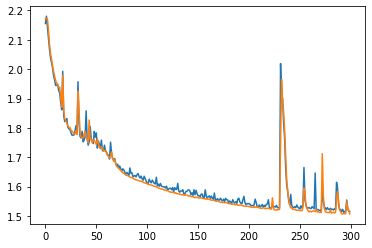

In [55]:
plt.plot(trainer.val_losses)
plt.plot(trainer.train_losses)